線形回帰モデル

### 線形回帰における線形とはターゲットに対してパラメータが線形であること

# 1.この課題の目的

オブジェクト指向を意識した実装に慣れる

数式をコードに落とし込めるようにする

スクラッチを通して線形回帰を理解する

基本的な機械学習のキーワードを学習する

# 2.スクラッチによる実装
NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

## 【問題1】線形回帰のクラスを作成する

線形回帰のクラスを作成し、Sprint2で作成した回帰のパイプラインに組み込んでください。

以下が雛形です。ここにメソッドを加えていってください。メソッドやパラメータなどはscikit-learnを参考にしてください。

sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
import sys
sys.path.append("/Users/morio/diveintocode-ml/ml-scratch")
from utils.ScratchLinearRegression import ScratchLinearRegression

In [ ]:
ScratchLinearRegression()

In [324]:
df_train = pd.read_csv("/Users/morio/diveintocode-ml/input/week4/train.csv")
columns = ["GrLivArea", "YearBuilt", "SalePrice"]
df_train2 = df_train[columns]
df_train2.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [320]:
df_train2.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [321]:
pd.set_option('display.max_columns', 100)

In [322]:
X = np.array([[1,2],[1,2]])
y = np.array([1,2])

In [325]:
X = df_train2.drop("SalePrice", axis=1).values  # valursでarrayに変換
y = df_train2["SalePrice"].values

In [326]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

/Users/morio/.pyenv/versions/anaconda3-5.3.0/envs/python-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/morio/.pyenv/versions/anaconda3-5.3.0/envs/python-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [328]:
model = ScratchLinearRegression()

In [329]:
model.fit(X_train,y_train, X_val=X_test, y_val=y_test)

In [330]:
(a,b) = X.shape

## 【問題2】学習曲線のプロット
まず、学習曲線を表示する関数を作成してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

In [331]:
#MSEのプロット
import matplotlib.pyplot as plt
%matplotlib inline
def plot_loss_train_and_val(loss,val_loss):
    """
    学習曲線をプロットします。
    
    loss : array
    一回ごとの勾配降下方のロスのログ(train)
     val_los : array
    一回ごとの勾配降下方のロスのログ(val or test)
    """
    plt.figure(figsize=(8,5))
    plt.title("model_loss")
    plt.xlabel("iter")
    plt.ylabel("loss")
    plt.plot(loss, label="train_loss")
    plt.plot(val_loss, label="val_loss")
    plt.yscale("log")
    plt.legend()

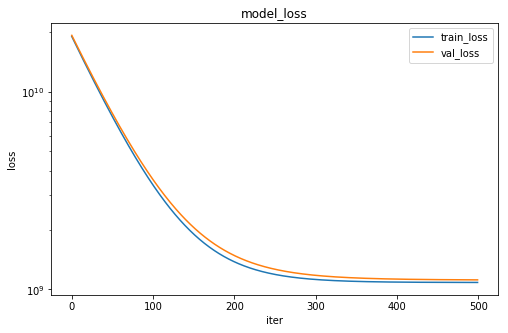

In [332]:
plot_loss_train_and_val(model.loss, model.val_loss)


## 【問題3】（アドバンス課題）バイアス項の除去
バイアス項 
θ0

 を抜くと学習がどう変化するか検証してください。
 
 また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [333]:
model_vnone = ScratchLinearRegression(bias=None)

In [334]:
model_vnone.fit(X_train,y_train, X_val=X_test, y_val=y_test)

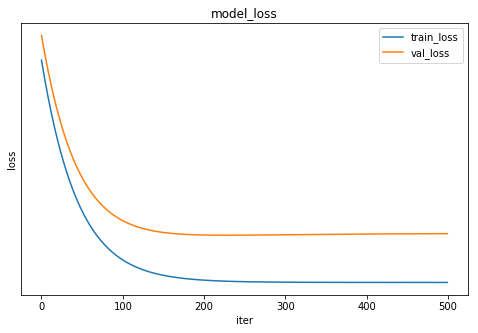

In [335]:
#バイアスあり
plot_loss_train_and_val(model_vnone.loss, model_vnone.val_loss)

#### 誤差が全体的に大きくなっている、またトレインデータとバリデーションデータのlossの差がバイアスありの場合と比べて開いている。今回は特徴量が二つしかないので、バイアスがない影響が大きいのか？

In [336]:
y_pred = model.predict(X)
y_perd_vnone = model_vnone.predict(X)

In [337]:
import seaborn as sns

Text(0, 0.5, 'y_pred')

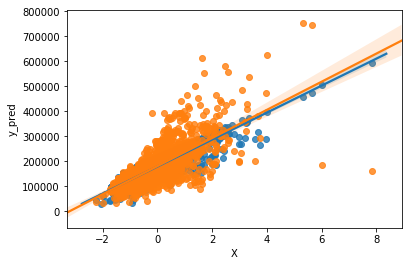

In [338]:
#バイアスあり
sns.regplot(X[:,0],y_pred[:,0])
sns.regplot(X[:,0],y)
plt.xlabel("X")
plt.ylabel("y_pred")

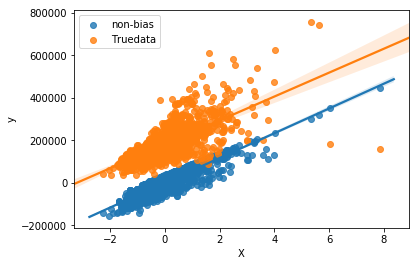

In [340]:
#バイアスなし
sns.regplot(X[:,0],y_perd_vnone[:,0], label="non-bias")
sns.regplot(X[:,0],y, label="Truedata")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

#### バイアスがない＝切片がないので予測線が０　０の地点を通っている。傾き自体は実際のyの回帰線（黄色線）とほとんど同じだが、切片がない分ずれているのがわかる。そのため誤差も大きくなっている。　ypredがマイナスになってしまうこともある。（標準化しているから）

## やってません【問題4】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。


In [351]:
#X２を２乗したX3を追加したモデル
#二乗
X = df_train2.drop("SalePrice", axis=1).values  # valursでarrayに変換
y = df_train2["SalePrice"].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
#b = (X[:,0]**2).reshape(len(X),1)
#X = np.hstack((X, b))
#X = np.hstack((X, X))
X = np.hstack((X, (X[:, 0:2]**2)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#model3 = ScratchLinearRegression()
#model3.fit(X_train,y_train, X_val=X_test, y_val=y_test)

/Users/morio/.pyenv/versions/anaconda3-5.3.0/envs/python-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/morio/.pyenv/versions/anaconda3-5.3.0/envs/python-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [348]:
model3 = ScratchLinearRegression()
model3.fit(X_train,y_train, X_val=X_test, y_val=y_test)

/Users/morio/diveintocode-ml/ml-scratch/utils/ScratchLinearRegression.py:146: RuntimeWarning: overflow encountered in add
  mse = (1 / (2 * m)) * sum((y_pred - y) ** 2)
/Users/morio/diveintocode-ml/ml-scratch/utils/ScratchLinearRegression.py:146: RuntimeWarning: overflow encountered in square
  mse = (1 / (2 * m)) * sum((y_pred - y) ** 2)


In [349]:
pred2 = model3.predict(X_train)

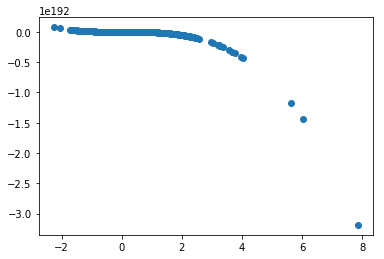

In [350]:
plt.scatter(X_train[:,0], pred2)

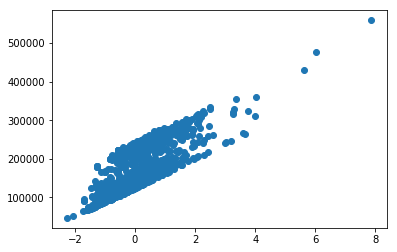

In [346]:
plt.scatter(X_train[:,0], pred3)

# 【問題7】スクラッチで学べることは何か
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。

ライブラリを使うのではなくスクラッチでアルゴリズムを実装したことで学べたことは何か
注意点

感想ではなく、他人を納得させられるような内容にしてください。

### 学べたこと

- クラスの便利さがわかった

まずコントラクタでインスタンス変数を初期化と値の受け取りをする。
インスタンス作成し、インスタンス変数を使うことで変数を作成して値を保持することができる。また関数にいちいち引数を渡す手間が省ける。


- 行列計算が理解できた。

いちいちforで取り出したりする手間が省ける。処理も早い。コードもスッキリかける。
まずは行列計算するとshapeがどうなっていくのか書き出すなりするとスムーズにコーディングできた。


- 数式とパラメーターの理解

数式が何をやっているのか実際に実装するとよくわかる。


- 標準化の効果が少しだけわかった

xの値が小さくなるので、結果としてアルファの調整が楽になった。（標準化しない場合xの数値が大きいととアルファも大きくしないと、シータの更新量が大きくなりすぎる。）